# Check mask file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys, os
from cellpose import io
from skimage.measure import label, regionprops

other_dir_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(other_dir_path)
import IMCprocess.spatial_analysis.mask_utils as mu

## import mask data

In [2]:
mask = io.imread('example_data/Patient2_002.tiff')
img_overlay = io.imread('example_data/Patient2_002_overlay.tiff')
tissue_mask = io.imread('example_data/Patient2_002_tissue_mask.tiff')
cancer_mask= io.imread('example_data/Patient2_002_cancer_mask.tiff')

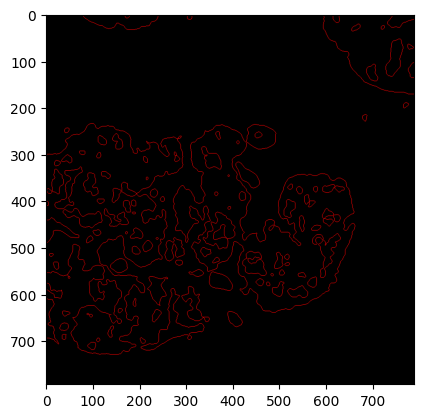

In [3]:
mask_outline = mu.plt_outline(mask, line_color=(1, 0, 0), mode='inner', overlay=None, output_file='output/Patient2_002_mask_outline.tiff')
tissue_outline = mu.plt_outline(tissue_mask, line_color=(1, 0, 0), mode='inner', overlay=None, output_file='output/Patient2_002_tissue_outline.tiff')
cancer_outline = mu.plt_outline(cancer_mask, line_color=(1, 0, 0), mode='inner', overlay=None, output_file='output/Patient2_002_cancer_outline.tiff')

## cancer mask

### label cancer regions
cancer_labeled = label(cancer_mask)
cancer_regprops = regionprops(cancer_labeled)
cancer_reg = mu.table_region(cancer_regprops)

In [4]:
cancer_labeled = label(cancer_mask)
cancer_regprops = regionprops(cancer_labeled)
cancer_reg = mu.table_region(cancer_regprops)
cancer_reg

,label,area,centroid_x,centroid_y
0,1,3892,12.951953,162.641316
1,2,122,5.098361,307.000000
2,3,21349,71.922432,703.838306
3,4,101,194.663366,769.653465
4,5,118,221.449153,682.016949
5,6,68937,445.370309,130.020018
6,7,69068,443.531520,471.997437
7,8,98,248.632653,44.000000
8,9,1390,346.306475,431.846043
9,10,236,383.368644,230.593220


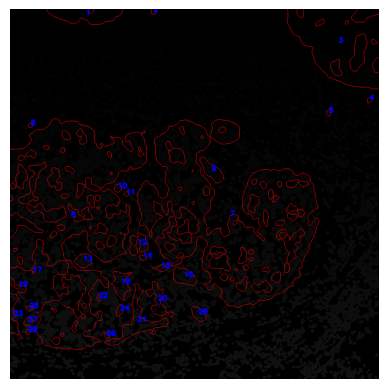

In [5]:
cancer_outline_label = mu.plt_outline_label(mask, cancer_regprops, cancer_labeled, 
                                            line_color=(1, 0, 0), mode='inner', 
                                            output_file='output/Patient2_002_cancer_outline_label.tiff')

### check a cell_i in cell mask located in region_i from cancer mask0

In [6]:
cell_labeled = label(mask)
cell_regprops = regionprops(cell_labeled)
cell_in_cancer, cell_outside_cancer = mu.cell_in_region(cell_regprops, cancer_regprops)
for cancer_i in cell_in_cancer.keys():
    if len(cell_in_cancer[cancer_i]) > 0:
        print(f"region {cancer_i} has {len(cell_in_cancer[cancer_i])} cells")

region 1 has 52 cells
region 2 has 1 cells
region 3 has 238 cells
region 5 has 1 cells
region 6 has 1060 cells
region 7 has 1054 cells
region 20 has 7 cells
region 21 has 33 cells
region 26 has 17 cells


In [7]:
# add number of cells in each region to the table
cancer_reg['num_cells'] = cancer_reg['label'].map(lambda x: len(cell_in_cancer[x]))
cancer_reg['cells_in_region'] = cancer_reg['label'].map(
    lambda x: cell_in_cancer[x])
cancer_reg

,label,area,centroid_x,centroid_y,num_cells,cells_in_region
0,1,3892,12.951953,162.641316,52,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 34, 38, 39, 4..."
1,2,122,5.098361,307.000000,1,[64]
2,3,21349,71.922432,703.838306,238,"[25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 4..."
3,4,101,194.663366,769.653465,0,[]
4,5,118,221.449153,682.016949,1,[1097]
5,6,68937,445.370309,130.020018,1060,"[1146, 1148, 1152, 1154, 1155, 1158, 1159, 116..."
6,7,69068,443.531520,471.997437,1054,"[1156, 1157, 1162, 1163, 1164, 1165, 1166, 116..."
7,8,98,248.632653,44.000000,0,[]
8,9,1390,346.306475,431.846043,0,[]
9,10,236,383.368644,230.593220,0,[]


## Tissue mask

In [8]:
tissue_labeled = label(tissue_mask)
tissue_regprops = regionprops(tissue_labeled)
tissue_reg = mu.table_region(tissue_regprops)
tissue_reg

,label,area,centroid_x,centroid_y
0,1,588488,390.677767,390.951374
1,2,95,742.515789,785.936842


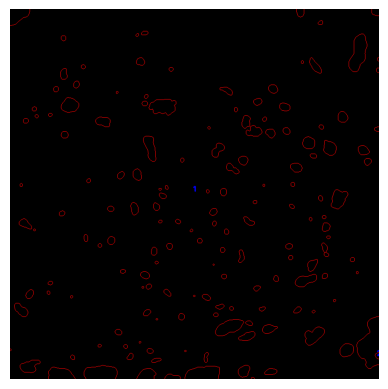

In [9]:
tissue_outline_label = mu.plt_outline_label(tissue_mask, tissue_regprops, tissue_labeled, 
                                            line_color=(1, 0, 0), mode='inner', 
                                            output_file='output/Patient2_002_tissue_outline_label.tiff')

In [10]:
cell_in_tissue, cell_outside_tissue = mu.cell_in_region(cell_regprops, tissue_regprops)
for tissue_i in cell_in_tissue.keys():
    if len(cell_in_tissue[tissue_i]) > 0:
        print(f"Tissue region {tissue_i} has {len(cell_in_tissue[tissue_i])} cells")

Tissue region 1 has 4577 cells


In [11]:
# add number of cells in each region to the table
tissue_reg['num_cells'] = tissue_reg['label'].map(
    lambda x: len(cell_in_tissue[x]))
# add list of cells in each region to the table
tissue_reg['cell_in_regions'] = tissue_reg['label'].map(
    lambda x: cell_in_tissue[x])

In [12]:
tissue_reg

,label,area,centroid_x,centroid_y,num_cells,cell_in_regions
0,1,588488,390.677767,390.951374,4577,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,2,95,742.515789,785.936842,0,[]


### check cells that are in stroma ( located in tissue but not in cancer cell )

In [13]:
import itertools
def get_all_cells_in_region(cell_in_region):
    all_cells_in_region = list(itertools.chain.from_iterable(cell_in_region.values()))
    return all_cells_in_region

In [14]:
all_cell_in_cancer = get_all_cells_in_region(cell_in_cancer)
all_cell_in_tissue = get_all_cells_in_region(cell_in_tissue)

In [15]:
cell_in_both_cancer_tissue = list(set(all_cell_in_cancer).intersection(
    set(all_cell_in_tissue)))

In [16]:
cell_in_stroma = list(set(all_cell_in_tissue).difference(cell_in_both_cancer_tissue))

In [20]:
cell_data = pd.DataFrame({'cells_in_stroma': [cell_in_stroma],
                          'cells_in_cancer': [cell_in_cancer],
                          'cells_in_cancer&tissue': [cell_in_both_cancer_tissue],
                          'num_cells_in_stroma': [len(cell_in_stroma)],
                          'num_cells_in_cancer': [len(cell_in_cancer)],
                          'num_cells_in_cancer&tissue': [len(cell_in_both_cancer_tissue)]
                          })

,cells_in_stroma,cells_in_cancer
0,"[1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22...","[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 25, 26, 27, 2..."
